### Install the required libraries

In [114]:
from pip._internal import main as pip
%matplotlib inline

try:
    import datetime
except ImportError:
    pip(['install', 'datetime'])
    import datetime

try:
    import subprocess
except ImportError:
    pip(['install', 'subprocess'])
    import subprocess

try:
    import json
except ImportError:
    pip(['install', 'json'])
    import json

try:
    import requests
except ImportError:
    pip(['install', 'request'])
    import requests

try:
    import pandas as pd
except ImportError:
    pip(['install', 'pandas'])
    import pandas as pd

try:
    import numpy as np
except ImportError:
    pip(['install', 'numpy'])
    import numpy as np
    
try:
    import urllib
except ImportError:
    pip(['install', 'urllib'])
    import urllib

try:
    import matplotlib.pyplot as plt
except ImportError:
    pip(['install', 'matplotlib'])
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except ImportError:
    pip(['install', 'seaborn'])
    import seaborn as sns
    
try:
    import os
except ImportError:
    pip(['install', 'os'])
    import os

### Test item

In [115]:
from IPython.core.display import HTML
def smiles_to_image_html(smiles):
    return '<img style="width:150px" src="http://chemidconvert.cloud.douglasconnect.com/v1/asSvg?smiles={}"/>'.format(urllib.parse.quote(smiles))

pd.set_option('display.max_colwidth', -1)

compounds = pd.DataFrame(columns=['Compound name', 'Smiles', 'Image'])

compoundset = ['Rosiglitazone']
for compound in compoundset:
    compoundreq = requests.get('https://chemidconvert.cloud.douglasconnect.com/v1/name/to/smiles', params={'name': compound});
    smiles = compoundreq.json()['smiles']
    compounds = compounds.append({'Compound name': compound, 'Smiles': smiles, 'Image': smiles}, ignore_index=True)
    
HTML(compounds.to_html(escape=False ,formatters=dict(Image=smiles_to_image_html)))
#HTML(compounds.to_html(escape=False))

,Compound name,Smiles,Image
0,Rosiglitazone,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c3ccccn3,


### Download dataset
* make sure to **select only one test item** in the Edelweiss DataExplorer. Also the experiment number should be selected in the DataExplorer.
* paste the API link into a URL variable
* automatically replace the "query=" with the "limit=10000" at the end of the URL in order to download all the rows
* dataset is downloaded and converted to dataframe, which is printed out

In [116]:
URL = "https://registry.edelweiss.douglasconnect.com/datasets/f2302607-5f1c-4442-8cc9-05f49976f57c/data?query="

In [117]:
# replace the "query=" with the "limit=10000"
URL = URL.replace('query=', 'limit=10000')

In [118]:
# Download the dataset for a single test item
rawData = requests.get(URL)

# Check if download is successful
if rawData.status_code == 200:
    print('Download successful')
else:
    print('Download unsuccessful')

Download successful


In [119]:
# Convert json to dataframe dfData
dfData = pd.DataFrame.from_dict(json.loads(rawData.content.decode('utf-8'))['data'])

In [120]:
# Curate dataframe: replace empty strings with NaN and drop columns that contain only NaN values
dfData = dfData.replace('', np.nan)
dfData = dfData.dropna(axis='columns', how='all')

### List all columns from the datasets
* If the columns names are know, you can run the next step only

In [121]:
dfData

,Assay,Cell-name,Concentration,Concentration-unit,Endpoint,Execution-date,Exposure-time,Organisation-abbreviation,Plate-type,Response,Study-ID-or-name,Tested-compound,id
0,MTT,HepaRG,0.00,microM,Cell viability,11/2/2018,72h,DC,96wp,1.4500,Drug Pair Case,Troglitazone,1
1,MTT,HepaRG,0.00,microM,Cell viability,11/2/2018,72h,DC,96wp,1.5100,Drug Pair Case,Troglitazone,2
2,MTT,HepaRG,0.00,microM,Cell viability,11/2/2018,72h,DC,96wp,1.4400,Drug Pair Case,Troglitazone,3
3,MTT,HepaRG,3.91,microM,Cell viability,11/2/2018,72h,DC,96wp,1.5200,Drug Pair Case,Troglitazone,4
4,MTT,HepaRG,3.91,microM,Cell viability,11/2/2018,72h,DC,96wp,1.6400,Drug Pair Case,Troglitazone,5
5,MTT,HepaRG,3.91,microM,Cell viability,11/2/2018,72h,DC,96wp,1.4400,Drug Pair Case,Troglitazone,6
6,MTT,HepaRG,7.81,microM,Cell viability,11/2/2018,72h,DC,96wp,1.5900,Drug Pair Case,Troglitazone,7
7,MTT,HepaRG,7.81,microM,Cell viability,11/2/2018,72h,DC,96wp,1.7600,Drug Pair Case,Troglitazone,8
8,MTT,HepaRG,7.81,microM,Cell viability,11/2/2018,72h,DC,96wp,1.4500,Drug Pair Case,Troglitazone,9
9,MTT,HepaRG,15.63,microM,Cell viability,11/2/2018,72h,DC,96wp,1.7100,Drug Pair Case,Troglitazone,10


In [122]:
dfData.columns

Index(['Assay', 'Cell-name', 'Concentration', 'Concentration-unit', 'Endpoint',
       'Execution-date', 'Exposure-time', 'Organisation-abbreviation',
       'Plate-type', 'Response', 'Study-ID-or-name', 'Tested-compound', 'id'],
      dtype='object')

### Select dose-reponse data
* Provide the names of the columns that you want to select

In [123]:
dfDoseResponse = dfData[['Concentration', 'Response']]

### Normalization of response

In [124]:
negControl = dfDoseResponse[dfDoseResponse['Concentration'] == 0.0]['Response'].mean()

fn = lambda row: row.Response / negControl * 100. # define a function for the new column
col = dfDoseResponse.apply(fn, axis=1) # get column data with an index
dfDoseResponse = dfDoseResponse.assign(NormalizedResponse=col.values) 

dfDoseResponse #use dfDoseResponse.head() to show the first 5 rows only

,Concentration,Response,NormalizedResponse
0,0.00,1.4500,98.863636
1,0.00,1.5100,102.954545
2,0.00,1.4400,98.181818
3,3.91,1.5200,103.636364
4,3.91,1.6400,111.818182
5,3.91,1.4400,98.181818
6,7.81,1.5900,108.409091
7,7.81,1.7600,120.000000
8,7.81,1.4500,98.863636
9,15.63,1.7100,116.590909


### Prepare arguments for the R script

* in a BMR_levels enter the BMR levels list for which the BMD should be computed

In [125]:
testItems = '_'.join(dfData['Tested-compound'].unique().tolist())

In [126]:
now = datetime.datetime.now()
id =  '_'.join([str(now.year), str(now.month), str(now.day), str(now.hour), str(now.minute), str(now.second)])

jsonFile = "f_" + testItems + '_' + id + ".json" 
jsonFile2 = "f_" + testItems + '_' + id + "_2.json" 

pngFile =  "f_raw_" + testItems + '_' + id + ".png"
pngFile2 =  "f_raw_" + testItems + '_' + id + "_2.png"
csvFile = 'f_raw_' + testItems + '_' + id + '.csv'

In [127]:
BMR_levels = [10, 20, 50]
nBMR = str(len(BMR_levels))

xValues = dfDoseResponse.loc[:, 'Response'].astype(str).tolist()
xTotal = str(len(xValues))
yValues = dfDoseResponse.loc[:, 'Concentration'].astype(str).tolist()
yTotal = str(len(yValues))
scriptArguments = [xTotal, yTotal] + xValues + yValues + [nBMR] + [str(i) for i in BMR_levels]
scriptArguments.append('Concentration')  # name of the x-axis in the BMD plot
scriptArguments.append('Response')  # name of the y-axis in BMD plot
scriptArguments.append(jsonFile)  # unique JSON filename
scriptArguments.append(jsonFile2)  # unique JSON filename

### Run the R script

* note that bmd_2.0.R script creates two JSON files as output. In the first one, the summary of BMD is collected, while in the second the predictions for the dose-response curve and confidence intervals are collected.

In [128]:
command = ['Rscript', './bmd_3.0.R'] + scriptArguments
scriptOutput = subprocess.check_output(command)

### Read the errors & messages from the R script

In [129]:
jsonData = open("message.json").read()
dictMsg = json.loads(jsonData)
os.remove("message.json")

print("Error:", dictMsg['Error'][0], '\n')
print("Message:", dictMsg['Message'][0])

# create boolean variable "allOk"
err = dictMsg['Error'][0]
if err == "False":
    allOk = True
elif err == "True":
    allOk = False

Error: False 

Message: BMD calculations done.


### Read the first JSON file and print BMD summary to a easier-to-read csv file
Remove the JSON file after that.

In [130]:
if allOk:
    jsonData = open(jsonFile).read()
    dictBMD = json.loads(jsonData)
    dfBMD = pd.DataFrame.from_dict(dictBMD)
    dfBMD.index = BMR_levels
    dfBMD.reset_index(inplace=True)
    dfBMD.rename(columns={'index': 'BMR', 'Estimate': 'BMD', 'Lower': 'BMDL', 'Upper': 'BMDU'}, inplace=True)
    dfBMD.to_csv(csvFile, index=False)
    os.remove(jsonFile)
else:
    print("Error:", dictMsg['Error'][0], '\n')
    print("Message:", dictMsg['Message'][0])

### Read the second JSON file (curve prediction) and make two plots
Remove the JSON file after that.

In [131]:
if allOk:
    jsonData = open(jsonFile2).read()
    dictDR = json.loads(jsonData)
    dfDR = pd.DataFrame.from_dict(dictDR)
    os.remove(jsonFile2)
else:
    print("Error:", dictMsg['Error'][0], '\n')
    print("Message:", dictMsg['Message'][0])

### Plot 1: predicted curve with confidence intervals

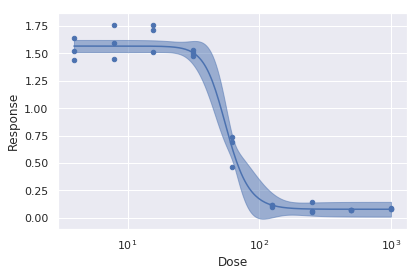

In [132]:
if allOk:
    sns.set()

    # define color palette
    cp = sns.color_palette("deep")

    plt.fill_between(dfDR['conc'].values, dfDR['Lower'].values, dfDR['Upper'].values, color=cp[0], alpha=0.5)
    plt.plot(dfDR['conc'].values, dfDR['Prediction'].values, color=cp[0])

    dfDoseResponseCut = dfDoseResponse[dfDoseResponse["Concentration"] > 0]
    plt.scatter(dfDoseResponseCut['Concentration'].values, dfDoseResponseCut['Response'].values, color=cp[0], s=20)

    # Set logarithmic x axis
    plt.xscale("log")

    # Set axes names
    plt.xlabel("Dose")
    plt.ylabel("Response")

    # make sure labels are not cut from the final figure
    plt.tight_layout()

    # Save to the png file
    plt.savefig(pngFile)
else:
    dfDoseResponseCut = dfDoseResponse[dfDoseResponse["Concentration"] > 0]
    plt.scatter(dfDoseResponseCut['Concentration'].values, dfDoseResponseCut['Response'].values, color=cp[0], s=20)

    # Set logarithmic x axis
    plt.xscale("log")

    # Set axes names
    plt.xlabel("Dose")
    plt.ylabel("Response")

    # make sure labels are not cut from the final figure
    plt.tight_layout()

    # Save to the png file
    plt.savefig(pngFile)

### Plot 2: predicted curve with BMD levels

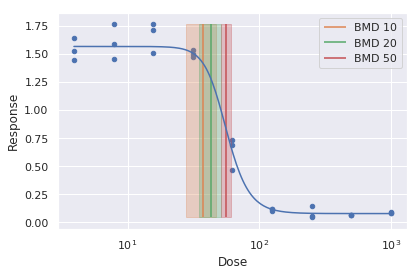

In [133]:
if allOk:
    plt.plot(dfDR['conc'].values, dfDR['Prediction'].values, color=cp[0])
    plt.scatter(dfDoseResponseCut['Concentration'].values, dfDoseResponseCut['Response'].values, color=cp[0], s=20)

    ymin = dfDoseResponse["Response"].min() 
    ymax = dfDoseResponse["Response"].max()

    # Plot BMD as vertical lines
    for i in range(dfBMD.shape[0]):
        plt.vlines(dfBMD.loc[i,"BMD"], ymin, ymax, color=cp[i+1], label="BMD " + str(dfBMD.loc[i, "BMR"]))

    # Shade the area between BMDL and BMDU - comment if don't want
    for i in range(dfBMD.shape[0]):
        plt.fill_betweenx([ymin, ymax], dfBMD.loc[i,"BMDL"], dfBMD.loc[i,"BMDU"], alpha=0.3, color=cp[i+1])

    # Set logairthmic x-axis
    plt.xscale('log')

    # Set the names of x and y axes
    plt.xlabel("Dose")
    plt.ylabel("Response")

    # Add the legend
    plt.legend()

    # make sure labels are not cut from the final figure
    plt.tight_layout()

    # Save to the png file
    plt.savefig(pngFile2)
else:
    print("Error:", dictMsg['Error'][0], '\n')
    print("Message:", dictMsg['Message'][0])

### Run the BMD calculation for normalized data

In [134]:
now = datetime.datetime.now()
id =  '_'.join([str(now.year), str(now.month), str(now.day), str(now.hour), str(now.minute), str(now.second)])

jsonFile = "f_" + testItems + '_' + id + ".json" 
jsonFile2 = "f_" + testItems + '_' + id + "_2.json" 

pngFile =  "f_norm_" + testItems + '_' + id + ".png"
pngFile2 =  "f_norm_" + testItems + '_' + id + "_2.png"
csvFile = 'f_norm_' + testItems + '_' + id + '.csv'

In [135]:
BMR_levels = [10, 20, 50]
nBMR = str(len(BMR_levels))

xValues = dfDoseResponse.loc[:, 'NormalizedResponse'].astype(str).tolist()
xTotal = str(len(xValues))
yValues = dfDoseResponse.loc[:, 'Concentration'].astype(str).tolist()
yTotal = str(len(yValues))
scriptArguments = [xTotal, yTotal] + xValues + yValues + [nBMR] + [str(i) for i in BMR_levels]
scriptArguments.append('Concentration')  # name of the x-axis in the BMD plot
scriptArguments.append('Normalized Response')  # name of the y-axis in BMD plot
scriptArguments.append(jsonFile)  # unique JSON filename
scriptArguments.append(jsonFile2)  # unique JSON filename

### Run the R script

* note that bmd_3.0.R script creates two JSON files as output. In the first one, the summary of BMD is collected, while in the second the predictions for the dose-response curve and confidence intervals are collected.

In [136]:
command = ['Rscript', './bmd_3.0.R'] + scriptArguments
scriptOutput = subprocess.check_output(command)

### Read the errors & messages from the R script

In [137]:
jsonData = open("message.json").read()
dictMsg = json.loads(jsonData)
os.remove("message.json")

print("Error:", dictMsg['Error'][0], '\n')
print("Message:", dictMsg['Message'][0])

# create boolean variable "allOk"
err = dictMsg['Error'][0]
if err == "False":
    allOk = True
elif err == "True":
    allOk = False

Error: False 

Message: BMD calculations done.


### Read the first JSON file and print BMD summary to a easier-to-read csv file
Remove the JSON file after that.

In [138]:
if allOk:
    jsonData = open(jsonFile).read()
    dictBMD = json.loads(jsonData)
    dfBMD = pd.DataFrame.from_dict(dictBMD)
    dfBMD.index = BMR_levels
    dfBMD.reset_index(inplace=True)
    dfBMD.rename(columns={'index': 'BMR', 'Estimate': 'BMD', 'Lower': 'BMDL', 'Upper': 'BMDU'}, inplace=True)
    dfBMD.to_csv(csvFile, index=False)
    os.remove(jsonFile)
else:
    print("Error:", dictMsg['Error'][0], '\n')
    print("Message:", dictMsg['Message'][0])

### Read the second JSON file (curve prediction) and make two plots
Remove the JSON file after that.

In [139]:
if allOk:
    jsonData = open(jsonFile2).read()
    dictDR = json.loads(jsonData)
    dfDR = pd.DataFrame.from_dict(dictDR)
    os.remove(jsonFile2)
else:
    print("Error:", dictMsg['Error'][0], '\n')
    print("Message:", dictMsg['Message'][0])

### Plot 1: predicted curve with confidence intervals

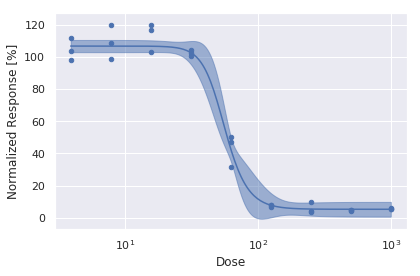

In [140]:
if allOk:
    sns.set()

    # define color palette
    cp = sns.color_palette("deep")

    plt.fill_between(dfDR['conc'].values, dfDR['Lower'].values, dfDR['Upper'].values, color=cp[0], alpha=0.5)
    plt.plot(dfDR['conc'].values, dfDR['Prediction'].values, color=cp[0])

    dfDoseResponseCut = dfDoseResponse[dfDoseResponse["Concentration"] > 0]
    plt.scatter(dfDoseResponseCut['Concentration'].values, dfDoseResponseCut['NormalizedResponse'].values, color=cp[0], s=20)

    # Set logarithmic x axis
    plt.xscale("log")

    # Set axes names
    plt.xlabel("Dose")
    plt.ylabel("Normalized Response [%]")

    # make sure labels are not cut from the final figure
    plt.tight_layout()

    # Save to the png file
    plt.savefig(pngFile)
else:
    dfDoseResponseCut = dfDoseResponse[dfDoseResponse["Concentration"] > 0]
    plt.scatter(dfDoseResponseCut['Concentration'].values, dfDoseResponseCut['NormalizedResponse'].values, color=cp[0], s=20)

    # Set logarithmic x axis
    plt.xscale("log")

    # Set axes names
    plt.xlabel("Dose")
    plt.ylabel("Normalized Response [%]")

    # make sure labels are not cut from the final figure
    plt.tight_layout()

    # Save to the png file
    plt.savefig(pngFile)

### Plot 2: predicted curve with BMD levels

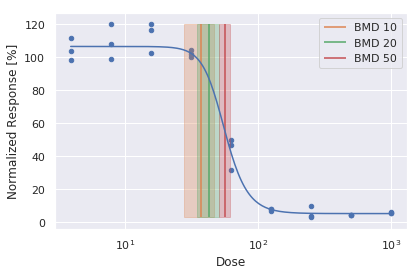

In [141]:
if allOk:
    plt.plot(dfDR['conc'].values, dfDR['Prediction'].values, color=cp[0])
    plt.scatter(dfDoseResponseCut['Concentration'].values, dfDoseResponseCut['NormalizedResponse'].values, color=cp[0], s=20)

    ymin = dfDoseResponse["NormalizedResponse"].min() 
    ymax = dfDoseResponse["NormalizedResponse"].max()

    # Plot BMD as vertical lines
    for i in range(dfBMD.shape[0]):
        plt.vlines(dfBMD.loc[i,"BMD"], ymin, ymax, color=cp[i+1], label="BMD " + str(dfBMD.loc[i, "BMR"]))

    # Shade the area between BMDL and BMDU - comment if don't want
    for i in range(dfBMD.shape[0]):
        plt.fill_betweenx([ymin, ymax], dfBMD.loc[i,"BMDL"], dfBMD.loc[i,"BMDU"], alpha=0.3, color=cp[i+1])

    # Set logairthmic x-axis
    plt.xscale('log')

    # Set the names of x and y axes
    plt.xlabel("Dose")
    plt.ylabel("Normalized Response [%]")

    # Add the legend
    plt.legend()

    # make sure labels are not cut from the final figure
    plt.tight_layout()

    # Save to the png file
    plt.savefig(pngFile2)
else:
    print("Error:", dictMsg['Error'][0], '\n')
    print("Message:", dictMsg['Message'][0])